<img width="800px" src="./img/OpenClassroom_LOGO.png"></img>
# <!-- TITLE --> [P08] -  App Dating / Prédiction des Likes
<!-- DESC --> Episode 3 : Prédiction, observations des résultats
<!-- AUTHOR : Philippe HOTON (OpenClassRooms) -->

## Objectif :
 - Prédire les likes des personas

Savoir si une personne plaît à une autre dépend de plusieurs facteurs :
la présentation textuelle, les goûts, la personnalité, les valeurs présentés 
les photos du profil, le visage, la silhouette,  la tenue vestimentaire, le décor, l’entourage, qui donnent une idée dans quel milieu social, la personne évolue etc
Ici, nous allons nous  concentrer uniquement sur le visage.

## ce que nous allons faire :

 - Entraîner des modèles , régression logistique et réseau de neurones
 - Evaluer les performances
 - Retester les modèles après augmentation des données

In [1]:
# Chargement des modules 
from sklearn.model_selection import train_test_split
from functions import *
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score
import matplotlib
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Préparation des données

In [2]:



UPLOAD_FOLDER = './uploads'

#personas_likes= [ {},{},{},{},{} ]
#pickle.dump(personas_likes, open("./save/personas_likes.pkl", "wb"))
std_scale = pickle.load(open("./save/kmeans_12.pkl", "rb"))

std_scale=pickle.load( open("./save/std_scale.pkl", "rb"))
pca= pickle.load(open("./save/pca.pkl", "rb")) 
data_sortie=pickle.load( open("./save/data_sortie.pkl", "rb"))
names=["./thumbs/img"+str(i)+".png" for i in range(len(data_sortie)+1)]
X_std=pickle.load( open("./save/X_std.pkl", "rb"))
personas_likes= pickle.load( open("./save/personas_likes.pkl", "rb"))
labels_={}
centers_={}
kms_={}
for iclusters in [12,24,48]:
    labels_[iclusters]=pickle.load( open("./save/labels_"+  str(iclusters)+".pkl", "rb"))
    centers_[iclusters]=pickle.load( open("./save/centers_"+  str(iclusters)+".pkl", "rb"))
    kms_[iclusters]=pickle.load( open("./save/kmeans_"+  str(iclusters)+".pkl", "rb"))

In [67]:
 d= { "profile":[],"user":[], "like":[],"name":[] }
for i,x in enumerate(data_sortie[0]):
    d["a"+str(i)]=[]
    df = pd.DataFrame(d) 
for profile,likes in enumerate(personas_likes):
    for user in likes:
        d= {  "profile":profile,"user":user, "like":likes[user],"name":personas[profile]["name"] }
        for j,y in enumerate(data_sortie[user]):
            d["a"+str(j)]=y
        df=df.append(d,ignore_index=True)
        
df

,profile,user,like,name,a0,a1,a2,a3,a4,a5,...,a54,a55,a56,a57,a58,a59,a60,a61,a62,a63
0,0.0,2867.0,0.0,Peter,-7.060719,3.468481,-1.573207,-4.590666,1.447589,-1.156715,...,0.731173,-0.574694,-1.284267,-0.588610,1.230350,0.037712,-0.463021,-0.342712,-0.151443,-0.051553
1,0.0,789.0,0.0,Peter,2.181390,0.764266,3.889113,-1.863005,2.322578,-1.219422,...,1.011216,0.790747,0.431844,1.209907,0.703834,-1.291672,2.326418,-0.945141,-2.082864,0.875516
2,0.0,908.0,0.0,Peter,-0.179285,-1.441920,-6.078024,-0.952517,-2.867846,0.773482,...,0.552915,-0.744316,-0.367298,0.794830,-0.883445,-0.486493,0.185640,0.430182,0.579899,-0.380875
3,0.0,2583.0,0.0,Peter,-2.584644,-2.978035,-0.782038,0.024760,-0.994596,0.496936,...,1.057258,-0.269588,-0.432151,-0.002084,0.083443,0.356092,0.263623,-0.134952,0.714427,-0.157923
4,0.0,3294.0,1.0,Peter,-4.996038,0.204571,-0.081395,0.137128,-5.480306,-2.036312,...,-0.274375,-0.664329,-1.767645,-0.456793,0.463083,0.131413,0.872908,-0.126722,-1.524196,-0.254358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1534,3.0,2246.0,0.0,Carmelle,-1.926182,6.108980,-0.010331,2.229935,-0.438739,1.775925,...,-0.993522,0.126996,0.026975,0.345056,0.126215,0.166659,0.446512,0.354617,0.241421,-0.807087
1535,3.0,1952.0,0.0,Carmelle,-3.776509,-0.730299,-2.911057,1.748807,4.306639,2.133625,...,-0.296492,0.031596,-0.493798,-0.085071,-0.240187,-0.315314,-0.091201,-1.255395,1.295985,-0.301370
1536,3.0,994.0,0.0,Carmelle,4.226976,-4.282206,-2.815983,-1.026246,-1.380965,0.058850,...,-0.053521,1.055541,-0.502061,-0.041455,-0.292210,1.357858,-0.315284,0.830813,-0.456017,-0.148185
1537,3.0,1710.0,0.0,Carmelle,5.318315,-3.058595,-5.030077,-0.951445,0.277154,-0.477962,...,1.416566,0.316497,0.782908,0.173772,0.129063,0.267022,-0.544955,-0.245016,1.712657,0.594465


In [4]:
df.describe()

,profile,user,like,a0,a1,a2,a3,a4,a5,a6,...,a54,a55,a56,a57,a58,a59,a60,a61,a62,a63
count,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,...,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000
mean,1.521767,1659.987005,0.076673,0.085563,0.024175,0.011325,0.004089,0.001855,-0.002425,0.043146,...,0.008271,0.008991,0.019069,-0.018047,0.004449,0.003998,0.024628,-0.019826,0.007436,0.008099
std,1.134636,953.294649,0.266159,3.758649,3.170990,2.731050,2.507774,2.114249,2.047345,1.971143,...,0.746845,0.718247,0.719790,0.719462,0.681102,0.688920,0.657435,0.653361,0.643853,0.640431
min,0.000000,1.000000,0.000000,-7.379007,-5.249997,-6.503276,-6.919058,-6.328897,-6.658083,-6.113412,...,-2.598492,-2.683650,-2.370436,-2.768889,-2.364263,-2.590017,-2.258753,-2.181772,-2.167803,-2.003793
25%,0.000000,856.000000,0.000000,-3.203171,-2.471348,-1.900522,-1.810251,-1.483296,-1.445099,-1.236517,...,-0.476299,-0.429201,-0.449239,-0.510850,-0.440204,-0.429025,-0.407557,-0.459406,-0.423196,-0.426275
50%,2.000000,1662.000000,0.000000,-0.118753,-0.896272,-0.407289,-0.066041,0.070989,-0.030500,0.050072,...,-0.006125,-0.007776,0.022351,-0.012743,-0.011117,-0.018898,-0.003677,-0.029177,-0.009567,-0.001556
75%,3.000000,2490.000000,0.000000,3.574697,2.359652,1.676306,1.788493,1.443703,1.337269,1.413606,...,0.478777,0.484967,0.489842,0.442819,0.448083,0.456095,0.465543,0.425546,0.441974,0.412474
max,3.000000,3294.000000,1.000000,8.047584,8.531855,8.950326,7.525206,7.005275,6.140609,6.007795,...,2.765471,3.110823,2.564921,2.828744,2.782373,3.097952,2.326418,2.201385,2.146020,2.505901


In [59]:
df

,profile,user,like,a0,a1,a2,a3,a4,a5,a6,...,a54,a55,a56,a57,a58,a59,a60,a61,a62,a63
0,0.0,2867.0,0.0,-7.060719,3.468481,-1.573207,-4.590666,1.447589,-1.156715,0.188760,...,0.731173,-0.574694,-1.284267,-0.588610,1.230350,0.037712,-0.463021,-0.342712,-0.151443,-0.051553
1,0.0,789.0,0.0,2.181390,0.764266,3.889113,-1.863005,2.322578,-1.219422,-1.098782,...,1.011216,0.790747,0.431844,1.209907,0.703834,-1.291672,2.326418,-0.945141,-2.082864,0.875516
2,0.0,908.0,0.0,-0.179285,-1.441920,-6.078024,-0.952517,-2.867846,0.773482,1.429587,...,0.552915,-0.744316,-0.367298,0.794830,-0.883445,-0.486493,0.185640,0.430182,0.579899,-0.380875
3,0.0,2583.0,0.0,-2.584644,-2.978035,-0.782038,0.024760,-0.994596,0.496936,-1.172034,...,1.057258,-0.269588,-0.432151,-0.002084,0.083443,0.356092,0.263623,-0.134952,0.714427,-0.157923
4,0.0,3294.0,1.0,-4.996038,0.204571,-0.081395,0.137128,-5.480306,-2.036312,1.590038,...,-0.274375,-0.664329,-1.767645,-0.456793,0.463083,0.131413,0.872908,-0.126722,-1.524196,-0.254358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1534,3.0,2246.0,0.0,-1.926182,6.108980,-0.010331,2.229935,-0.438739,1.775925,1.465799,...,-0.993522,0.126996,0.026975,0.345056,0.126215,0.166659,0.446512,0.354617,0.241421,-0.807087
1535,3.0,1952.0,0.0,-3.776509,-0.730299,-2.911057,1.748807,4.306639,2.133625,-0.420458,...,-0.296492,0.031596,-0.493798,-0.085071,-0.240187,-0.315314,-0.091201,-1.255395,1.295985,-0.301370
1536,3.0,994.0,0.0,4.226976,-4.282206,-2.815983,-1.026246,-1.380965,0.058850,0.904275,...,-0.053521,1.055541,-0.502061,-0.041455,-0.292210,1.357858,-0.315284,0.830813,-0.456017,-0.148185
1537,3.0,1710.0,0.0,5.318315,-3.058595,-5.030077,-0.951445,0.277154,-0.477962,-2.336438,...,1.416566,0.316497,0.782908,0.173772,0.129063,0.267022,-0.544955,-0.245016,1.712657,0.594465


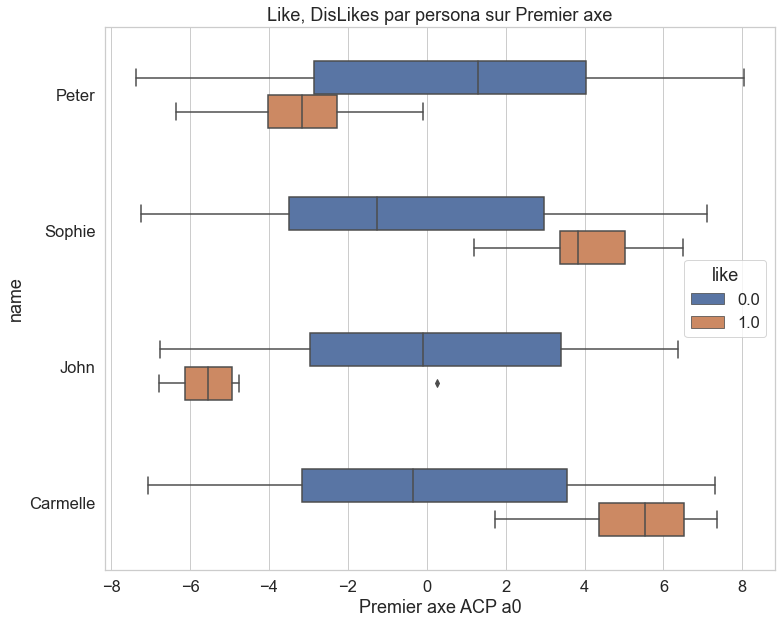

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 

sns.set(font_scale = 1.5)
sns.set_style("whitegrid")
# Grouped violinplot
sns.boxplot(x="a0", y="name", hue="like", data=df,width=0.5)
plt.xlabel("Premier axe ACP a0")
plt.title("Like, DisLikes par persona sur Premier axe")
plt.show()

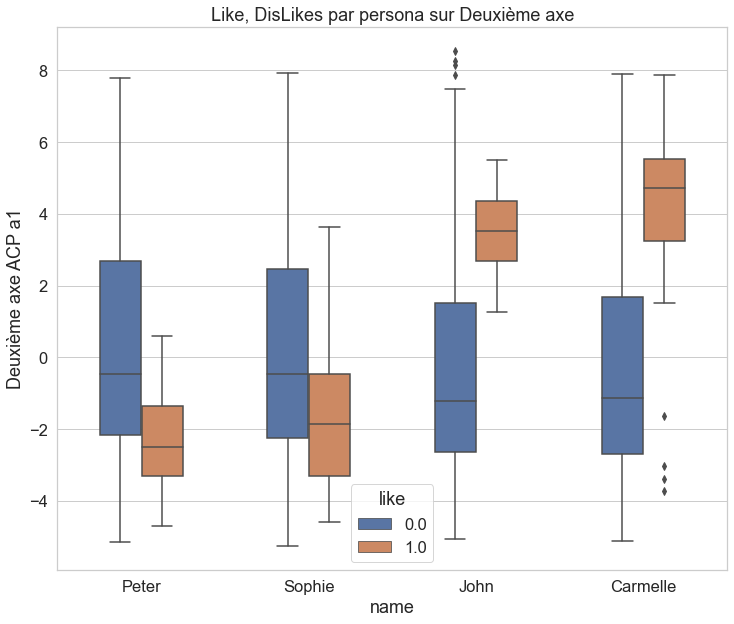

In [83]:
sns.boxplot(x="name", y="a1", hue="like", data=df,width=0.5)
plt.ylabel("Deuxième axe ACP a1")
plt.title("Like, DisLikes par persona sur Deuxième axe")
plt.show()

In [5]:
def augmented_df(profile,profile_df,nb):
    likes= personas_likes[profile]
    n=0
    for user in likes:
        if likes[user]==0:
            continue
        adds = get_nearests_from(data_sortie[user],data_sortie,10)
        #print(user," find ",len(adds))
        for user in adds:
            if len(profile_df[profile_df["user"]==user])==1:
                #print("already here ",user)
                continue
            d= {  "profile": profile,"user":user, "like":1 }
            for j,y in enumerate(data_sortie[user]):
                d["a"+str(j)]=y
            n+=1
            profile_df=profile_df.append(d,ignore_index=True)
        #print ("added ",n )
    return profile_df



def prepare_data_dnn(profile,df,augmented_like=False):
    profile_df=df[df.profile==profile].reset_index()
    if augmented_like:
         profile_df=augmented_df(profile,profile_df,10)
    profile_df=profile_df.drop([ 'profile','user',"index"], axis=1)
    # Use a utility from sklearn to split and shuffle your dataset.
    train_df, test_df = train_test_split(profile_df, test_size=0.2)
    train_df, val_df = train_test_split(train_df, test_size=0.2)
    # Form np arrays of labels and features.
    y_train = np.array(train_df.pop('like'))
    bool_y_train = y_train != 0
    y_val = np.array(val_df.pop('like'))
    y_test = np.array(test_df.pop('like'))
    x_train = np.array(train_df)
    x_val = np.array(val_df)
    x_test = np.array(test_df)
    likes= len(profile_df[ profile_df.like==1])
    unlikes=  len(profile_df[ profile_df.like==0])
    total= len(profile_df)
    weight_for_0 = (1 / unlikes) * (total / 2.0)
    weight_for_1 = (1 / likes) * (total / 2.0)
    class_weight = {0: weight_for_0, 1: weight_for_1}
    print('Examples:\n    Total: {}\n    Likes: {} ({:.2f}% of total)\n'.format(
    total, likes, 100 * likes / total))
    print('Training labels shape:', y_train.shape)
    print('Validation labels shape:', y_val.shape)
    print('Test labels shape:', y_test.shape)

    print('Training features shape:', x_train.shape)
    print('Validation features shape:', x_val.shape)
    print('Test features shape:', x_test.shape)

    sns.jointplot(data=profile_df, x="a0", y="a1", hue="like",kind="kde")
    plt.suptitle( personas[profile]["name"]  +" - Likes distribution " + ( "++" if augmented_like else "" ))
    plt.show()
    return x_train,x_test,x_val,y_train,y_test,y_val,class_weight
    

def get_train_data(profile,df,augmented_like=False):
    profile_df=df[df.profile==profile].reset_index()
    if augmented_like:
        profile_df=augmented_df(profile,profile_df,10)
    X = profile_df.drop(['like', 'profile','user',"index"], axis=1)
    y = profile_df['like']
    #X_train, X_test, y_train, y_test 
    return train_test_split(X, y)

#La première façon de vérifier que le modèle a marché consiste à regarder la matrice de confusion.


In [6]:
df

,profile,user,like,a0,a1,a2,a3,a4,a5,a6,...,a54,a55,a56,a57,a58,a59,a60,a61,a62,a63
0,0.0,2867.0,0.0,-7.060719,3.468481,-1.573207,-4.590666,1.447589,-1.156715,0.188760,...,0.731173,-0.574694,-1.284267,-0.588610,1.230350,0.037712,-0.463021,-0.342712,-0.151443,-0.051553
1,0.0,789.0,0.0,2.181390,0.764266,3.889113,-1.863005,2.322578,-1.219422,-1.098782,...,1.011216,0.790747,0.431844,1.209907,0.703834,-1.291672,2.326418,-0.945141,-2.082864,0.875516
2,0.0,908.0,0.0,-0.179285,-1.441920,-6.078024,-0.952517,-2.867846,0.773482,1.429587,...,0.552915,-0.744316,-0.367298,0.794830,-0.883445,-0.486493,0.185640,0.430182,0.579899,-0.380875
3,0.0,2583.0,0.0,-2.584644,-2.978035,-0.782038,0.024760,-0.994596,0.496936,-1.172034,...,1.057258,-0.269588,-0.432151,-0.002084,0.083443,0.356092,0.263623,-0.134952,0.714427,-0.157923
4,0.0,3294.0,1.0,-4.996038,0.204571,-0.081395,0.137128,-5.480306,-2.036312,1.590038,...,-0.274375,-0.664329,-1.767645,-0.456793,0.463083,0.131413,0.872908,-0.126722,-1.524196,-0.254358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1534,3.0,2246.0,0.0,-1.926182,6.108980,-0.010331,2.229935,-0.438739,1.775925,1.465799,...,-0.993522,0.126996,0.026975,0.345056,0.126215,0.166659,0.446512,0.354617,0.241421,-0.807087
1535,3.0,1952.0,0.0,-3.776509,-0.730299,-2.911057,1.748807,4.306639,2.133625,-0.420458,...,-0.296492,0.031596,-0.493798,-0.085071,-0.240187,-0.315314,-0.091201,-1.255395,1.295985,-0.301370
1536,3.0,994.0,0.0,4.226976,-4.282206,-2.815983,-1.026246,-1.380965,0.058850,0.904275,...,-0.053521,1.055541,-0.502061,-0.041455,-0.292210,1.357858,-0.315284,0.830813,-0.456017,-0.148185
1537,3.0,1710.0,0.0,5.318315,-3.058595,-5.030077,-0.951445,0.277154,-0.477962,-2.336438,...,1.416566,0.316497,0.782908,0.173772,0.129063,0.267022,-0.544955,-0.245016,1.712657,0.594465


# Chargement du Persona


In [7]:
personas =[
   
     {"name":"Peter","img":567, "age":"23","criterias":"Aime les jeunes femmes blondes."},
         {"name":"Sophie","img":484, "age":"25","criterias":"Aime les hommes bruns avec de la barbe."},
   {  "name":"John","img":1415, "age":"48","criterias":"Aime les femmes d'origine asiatique pas trop jeunes."},
    {"name":"Carmelle","img":1081, "age":"27","criterias":"Aime les hommes à la peau mate ou foncée."},
 {"name":"Me","img":-1, "age":"?","criterias":"..."}
]    
    

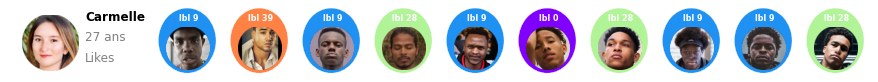

In [8]:
PERSONA=3
show_persona(personas[PERSONA],personas_likes[PERSONA]   ,names,labels_[48])
reports={}

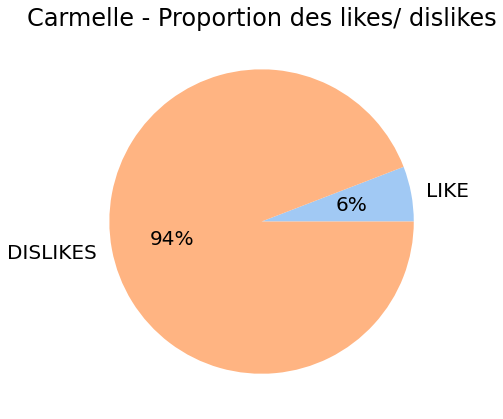

In [9]:
plt.rcParams['font.size'] = 20
fig, ax = plt.subplots(figsize=(7, 7))
#define data
nb_like = np.sum([ personas_likes[PERSONA][i] for i in personas_likes[PERSONA]]  )
nb_dislike =  len(personas_likes[PERSONA])-nb_like

colors = sns.color_palette('pastel')[0:2]
#create pie chart
plt.pie([ nb_like,nb_dislike   ]    , labels = ["LIKE","DISLIKES"], colors = colors, autopct='%.0f%%')
ax.set(aspect="equal", title= personas[PERSONA]["name"]+" - Proportion des likes/ dislikes")
plt.show()

# Régression logistique

In [10]:
x_train, x_test, y_train, y_test =get_train_data(PERSONA,df)
clr = LogisticRegression(class_weight="balanced",max_iter= 1000)
clr.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [11]:
pickle.dump(clr, open("./save/model_reglog_"+str(PERSONA) +".pkl", 'wb'))

<AxesSubplot:title={'center':'Carmelle-  Matrice de confusion LR'}>

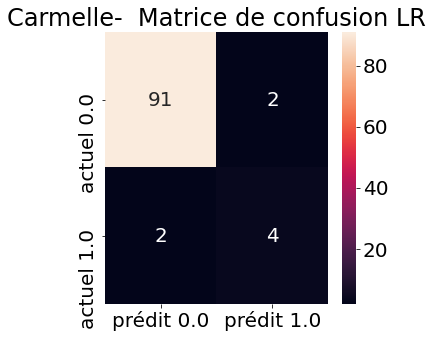

In [12]:
y_pred= clr.predict(x_test)
conf = confusion_matrix(y_test,y_pred)
conf
cf = pd.DataFrame(conf, columns=['prédit ' + str(_) for _ in clr.classes_])
cf.index = ['actuel ' + str(_) for _ in clr.classes_]

plt.figure(figsize=(5,5))
plt.title(personas[PERSONA]["name"] +"-  Matrice de confusion LR")
sns.heatmap(cf, annot=True, fmt="d")

In [13]:
reports["LR"]=classification_report(y_test, y_pred, target_names=["Unlike","Like"])
print(reports["LR"])

              precision    recall  f1-score   support

      Unlike       0.98      0.98      0.98        93
        Like       0.67      0.67      0.67         6

    accuracy                           0.96        99
   macro avg       0.82      0.82      0.82        99
weighted avg       0.96      0.96      0.96        99



In [14]:
clr.get_params(deep=True)

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

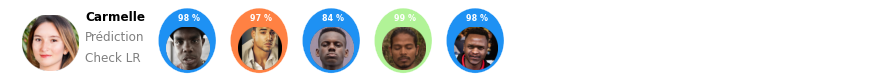

In [15]:
real_likes=[]
data_likes=[]
real_likes_predict=[]
for user in personas_likes[PERSONA]:
    if personas_likes[PERSONA][user]==1:
        real_likes.append(user)
        data_likes.append( data_sortie[user])
        
predicts=clr.predict_proba(data_likes)[:,1]
real_likes_predict= [  int(100*r) for  r in predicts]

show_predict_like(personas[PERSONA],"Check LR",real_likes,real_likes_predict,names,labels_[48])


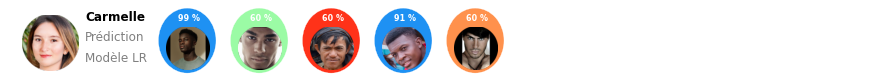

In [16]:
all_predict= clr.predict_proba(data_sortie)[:,1]
likes_logreg=[]
perc_logreg=[]
for i,r in enumerate(all_predict):
    if r>0.6:
        likes_logreg.append(i)
        perc_logreg.append( int(100*r) )

show_predict_like(personas[PERSONA],"Modèle LR",likes_logreg,perc_logreg,names,labels_[48])

# Réseau de neurones

## Modèle

In [17]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]
hidden1     = 128
hidden2     = 12

def make_model(metrics=METRICS, output_bias=None):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
    model = keras.Sequential([
    keras.layers.Input((64)),
    keras.layers.Dense( hidden1, activation='relu'),
    keras.layers.Dropout(0.2,noise_shape=None,seed=None),
    #keras.layers.Dense( hidden2, activation='relu'),
    #keras.layers.Dropout(0.3,noise_shape=None,seed=None),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])
    model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)
    return model

In [18]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [19]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               8320      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 8,449
Trainable params: 8,449
Non-trainable params: 0
_________________________________________________________________


Examples:
    Total: 393
    Likes: 23 (5.85% of total)

Training labels shape: (251,)
Validation labels shape: (63,)
Test labels shape: (79,)
Training features shape: (251, 64)
Validation features shape: (63, 64)
Test features shape: (79, 64)


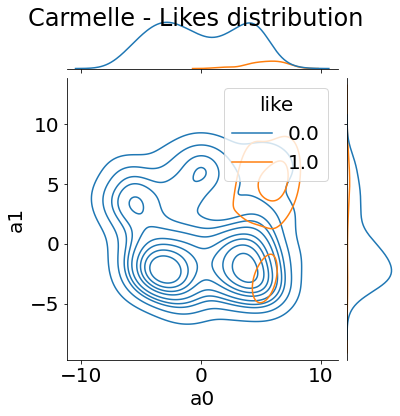

In [20]:
x_train,x_test,x_val,y_train,y_test,y_val,class_weight= prepare_data_dnn(PERSONA,df)

In [21]:
model.predict(x_train[:10])

array([[0.59332967],
       [0.81342673],
       [0.32453045],
       [0.18721521],
       [0.94600785],
       [0.79578316],
       [0.8836523 ],
       [0.9513219 ],
       [0.85106254],
       [0.94004035]], dtype=float32)

In [22]:
results = model.evaluate(x_train, y_train, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 1.8990


In [23]:
likes= np.sum(y_test)+np.sum(y_train)
unlikes= len(y_test)+len(y_train)-likes
initial_bias = np.log([likes/unlikes])
initial_bias

array([-2.74084002])

In [24]:
model = make_model(output_bias=initial_bias)
model.predict(x_train[:10])

array([[0.07587412],
       [0.13296413],
       [0.03272849],
       [0.04599562],
       [0.04221034],
       [0.0889883 ],
       [0.04582739],
       [0.02530828],
       [0.10510838],
       [0.0440647 ]], dtype=float32)

In [25]:
results = model.evaluate(x_train, y_train, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.2799


In [26]:
import os
import tempfile
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [27]:
# Compare models with and without biais 

In [28]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    x_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(x_val, y_val), 
    verbose=0,class_weight=class_weight)

In [29]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    x_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(x_val, y_val), 
    verbose=0,class_weight=class_weight)



In [30]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
def plot_loss(history, label, n):
    # Use a log scale on y-axis to show the wide range of values.
    plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
    plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

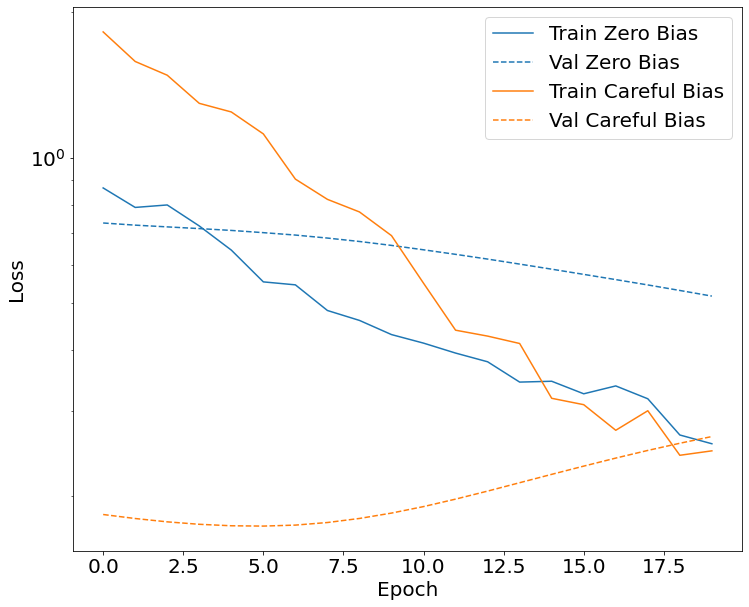

In [31]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)
plt.legend()

In [32]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    x_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(x_val, y_val),
 class_weight=class_weight)

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 1.9041 - tp: 3.0000 - fp: 7.0000 - tn: 288.0000 - fn: 16.0000 - accuracy: 0.9268 - precision: 0.3000 - recall: 0.1579 - auc: 0.4356 - prc: 0.1367 - val_loss: 0.1826 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 60.0000 - val_fn: 3.0000 - val_accuracy: 0.9524 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7972 - val_prc: 0.1418
Epoch 2/100
1/1 [==============================] - 0s 66ms/step - loss: 1.6482 - tp: 0.0000e+00 - fp: 2.0000 - tn: 233.0000 - fn: 16.0000 - accuracy: 0.9283 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.4746 - prc: 0.0637 - val_loss: 0.1790 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 60.0000 - val_fn: 3.0000 - val_accuracy: 0.9524 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8417 - val_prc: 0.1549
Epoch 3/100
1/1 [==============================] - 0s 35ms/step - loss: 1.4264 - tp: 1.0000 - fp: 2.0000 - tn: 233.0000 - fn: 15.0000 - ac

In [33]:
model.save('./save/model_fc_' +str( PERSONA))

INFO:tensorflow:Assets written to: ./save/model_fc_3/assets


In [34]:
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])
    
    plt.legend()

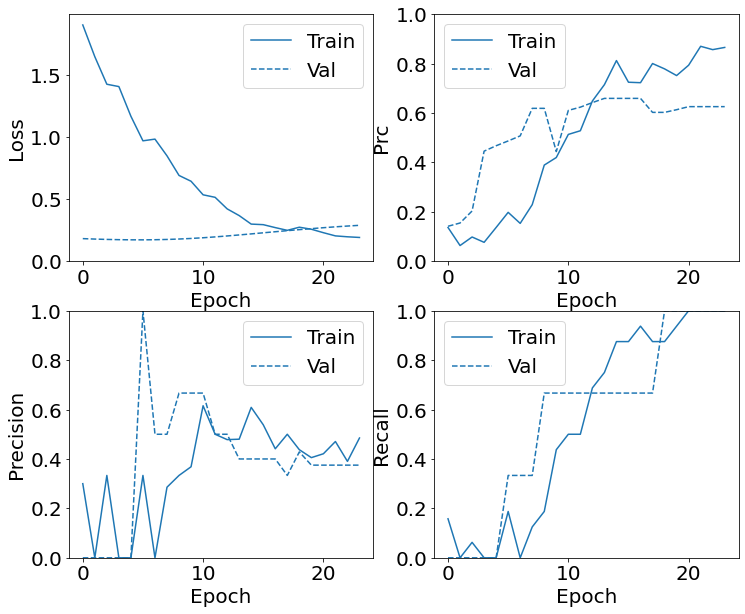

In [35]:
plot_metrics(baseline_history)

In [36]:
def plot_cm(labels, predictions, p=0.5,augmented=False):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title(personas[PERSONA]["name"] +"-  Matrice de confusion FC"+ ("+" if augmented else ""))
  plt.ylabel('Vrais Likes')
  plt.xlabel('Likes Prédits')

  print('Unlikes bien prédits  : ', cm[0][0])
  print('Unlikes mal prédits: ', cm[0][1])
  print('Like mal prédits : ', cm[1][0])
  print('Likes bien prédits: ', cm[1][1])
  print('Total Likes: ', np.sum(cm[1]))

loss :  0.2133021056652069
tp :  3.0
fp :  2.0
tn :  73.0
fn :  1.0
accuracy :  0.9620253443717957
precision :  0.6000000238418579
recall :  0.75
auc :  0.9866666793823242
prc :  0.8124665021896362

Unlikes bien prédits  :  73
Unlikes mal prédits:  2
Like mal prédits :  1
Likes bien prédits:  3
Total Likes:  4


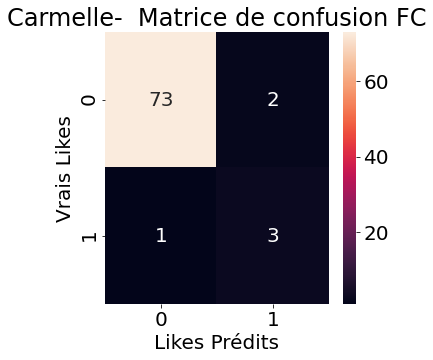

In [37]:
train_predictions_baseline = model.predict(x_train, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(x_test, batch_size=BATCH_SIZE)
baseline_results = model.evaluate(x_test, y_test,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(y_test, test_predictions_baseline)

In [38]:
y_prob= model.predict(x_test)
y_pred= [  1 if y>0.5 else 0  for  y in y_prob]
reports["FC"]=classification_report(y_test, y_pred, target_names=["Unlike","Like"])
print(reports["FC"])

              precision    recall  f1-score   support

      Unlike       0.99      0.97      0.98        75
        Like       0.60      0.75      0.67         4

    accuracy                           0.96        79
   macro avg       0.79      0.86      0.82        79
weighted avg       0.97      0.96      0.96        79



Accuracy : le pourcentage d'exemples correctement classés (Pas utile pour nous car on peut obtenir une accuracy élevée rien qu'en prédisant tous les échantillons unlike )

Précision : le pourcentage de Like prévus qui ont été correctement classés (très utile)

Recall : Le rappel est le pourcentage de Likes réels qui ont été classés correctement (très utile)

AUC se réfère à l'aire sous la courbe d'une courbe Receiver Operating Characteristic (ROC-AUC). Cette métrique est égale à la probabilité qu'un classificateur classe un échantillon aléatoire positif plus haut qu'un échantillon aléatoire négatif.

AUPRC fait référence à la zone sous la courbe de la courbe de précision-rappel. Cette métrique calcule des paires précision-rappel pour différents seuils de probabilité.

ROC

In [39]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,20])
  plt.ylim([80,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

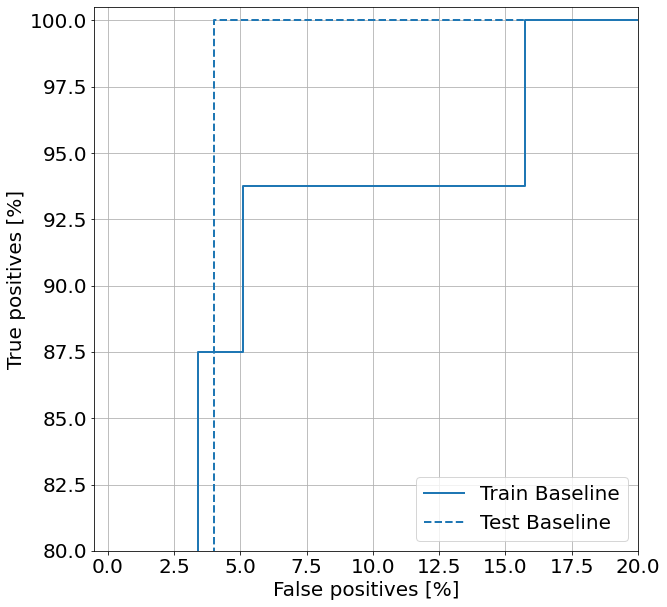

In [40]:
plot_roc("Train Baseline", y_train, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", y_test, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [41]:
model.predict(np.array([data_sortie[0]]))

array([[0.33798426]], dtype=float32)

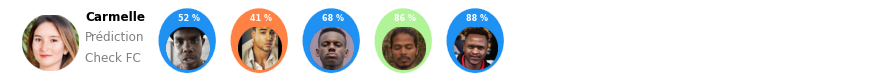

In [42]:
real_likes=[]
data_likes=[]
real_likes_predict=[]
for user in personas_likes[PERSONA]:
    if personas_likes[PERSONA][user]==1:
        real_likes.append(user)
        
        data_likes.append( data_sortie[user])
        
predicts=model.predict(np.array(data_likes))
real_likes_predict= [  int(100*r) for  r in predicts]

show_predict_like(personas[PERSONA],"Check FC",real_likes,real_likes_predict,names,labels_[48])

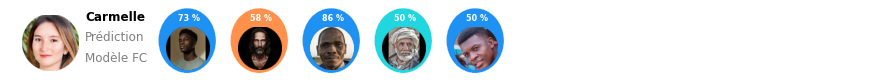

In [43]:
all_predict=  model.predict(data_sortie)
likes_dnn=[]
perc_dnn=[]
for i,r in enumerate(all_predict):
    if r>0.5:
        likes_dnn.append(i)
        perc_dnn.append( int(100*r) )
        
show_predict_like(personas[PERSONA],"Modèle FC",likes_dnn,perc_dnn,names,labels_[48])

# Synthèse Persona

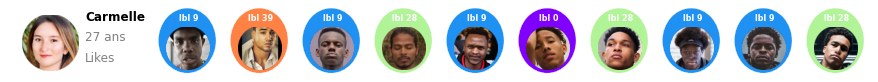

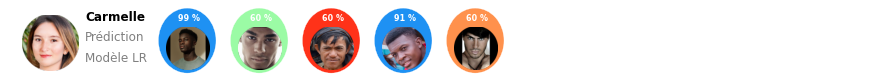

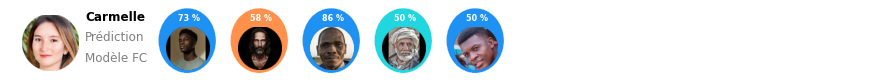

In [44]:
show_persona(personas[PERSONA],personas_likes[PERSONA]   ,names,labels_[48])
show_predict_like(personas[PERSONA],"Modèle LR",likes_logreg,perc_logreg,names,labels_[48])
show_predict_like(personas[PERSONA],"Modèle FC",likes_dnn,perc_dnn,names,labels_[48])

# Augmentation des données

In [45]:
x_train, x_test, y_train, y_test =get_train_data(PERSONA,df,augmented_like=True)
clr_augmented = LogisticRegression(class_weight="balanced",max_iter= 1000)
clr_augmented.fit(x_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [46]:
pickle.dump(clr_augmented, open("./save/model_reglog_augmented_"+str(PERSONA) +".pkl", 'wb'))

<AxesSubplot:title={'center':'Carmelle-  Matrice de confusion LR+'}>

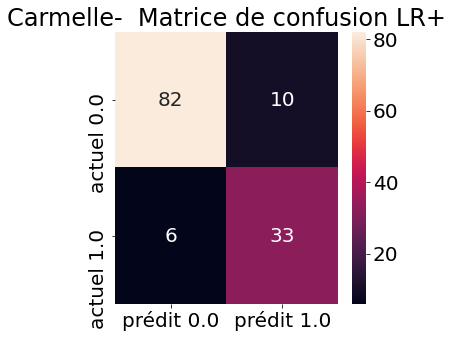

In [47]:
y_pred= clr_augmented.predict(x_test)
conf = confusion_matrix(y_test,y_pred)
conf
cf = pd.DataFrame(conf, columns=['prédit ' + str(_) for _ in clr_augmented.classes_])
cf.index = ['actuel ' + str(_) for _ in clr_augmented.classes_]

plt.figure(figsize=(5,5))
plt.title(personas[PERSONA]["name"]+"-  Matrice de confusion LR+")
sns.heatmap(cf, annot=True, fmt="d")

In [48]:
reports["LR+"]=classification_report(y_test, y_pred, target_names=["Unlike","Like"])
print(reports["LR+"])

              precision    recall  f1-score   support

      Unlike       0.93      0.89      0.91        92
        Like       0.77      0.85      0.80        39

    accuracy                           0.88       131
   macro avg       0.85      0.87      0.86       131
weighted avg       0.88      0.88      0.88       131



In [49]:
all_predict= clr_augmented.predict_proba(data_sortie)[:,1]
likes_logreg=[]
perc_logreg=[]
for i,r in enumerate(all_predict):
    if r>0.6:
        likes_logreg.append(i)
        perc_logreg.append( int(100*r) )

Examples:
    Total: 522
    Likes: 152 (29.12% of total)

Training labels shape: (333,)
Validation labels shape: (84,)
Test labels shape: (105,)
Training features shape: (333, 64)
Validation features shape: (84, 64)
Test features shape: (105, 64)


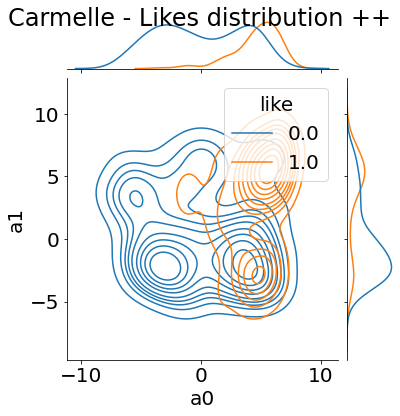

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 1.6077 - tp: 3.0000 - fp: 5.0000 - tn: 301.0000 - fn: 103.0000 - accuracy: 0.7379 - precision: 0.3750 - recall: 0.0283 - auc: 0.4642 - prc: 0.2620 - val_loss: 0.8502 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 60.0000 - val_fn: 24.0000 - val_accuracy: 0.7143 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5236 - val_prc: 0.2813
Epoch 2/100
1/1 [==============================] - 0s 106ms/step - loss: 1.4759 - tp: 2.0000 - fp: 2.0000 - tn: 229.0000 - fn: 100.0000 - accuracy: 0.6937 - precision: 0.5000 - recall: 0.0196 - auc: 0.5464 - prc: 0.3336 - val_loss: 0.7922 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 60.0000 - val_fn: 24.0000 - val_accuracy: 0.7143 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5865 - val_prc: 0.3088
Epoch 3/100
1/1 [==============================] - 0s 43ms/step - loss: 1.3673 - tp: 3.0000 - fp: 3.0000 - tn: 228.0000 - fn: 99.0000 - accuracy:

In [50]:
x_train,x_test,x_val,y_train,y_test,y_val,class_weight= prepare_data_dnn(PERSONA,df,augmented_like=True)
model_augmented = make_model()
model_augmented.load_weights(initial_weights)
baseline_history = model_augmented.fit(
    x_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(x_val, y_val),
 class_weight=class_weight)

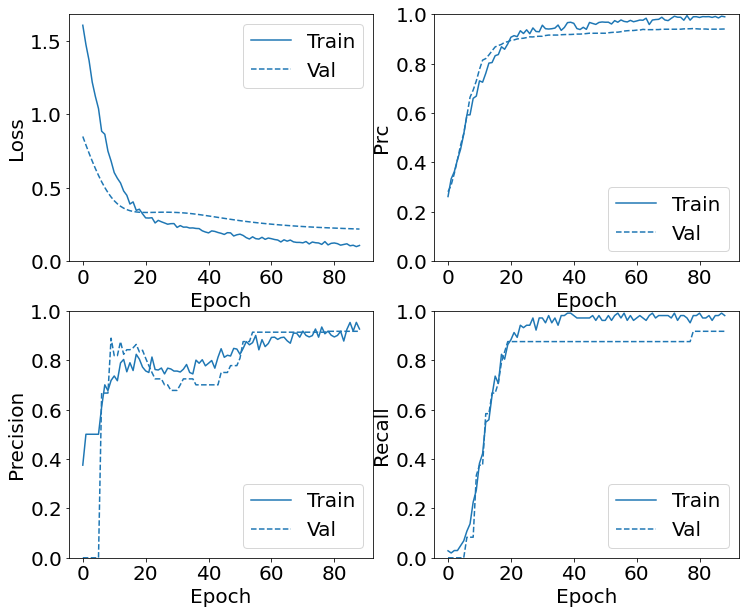

In [51]:
plot_metrics(baseline_history)

In [52]:
model_augmented.save('./save/model_fc_augmented_' +str( PERSONA))

INFO:tensorflow:Assets written to: ./save/model_fc_augmented_3/assets


loss :  0.36687949299812317
tp :  23.0
fp :  12.0
tn :  67.0
fn :  3.0
accuracy :  0.8571428656578064
precision :  0.6571428775787354
recall :  0.8846153616905212
auc :  0.9391431212425232
prc :  0.8303289413452148

Unlikes bien prédits  :  67
Unlikes mal prédits:  12
Like mal prédits :  3
Likes bien prédits:  23
Total Likes:  26


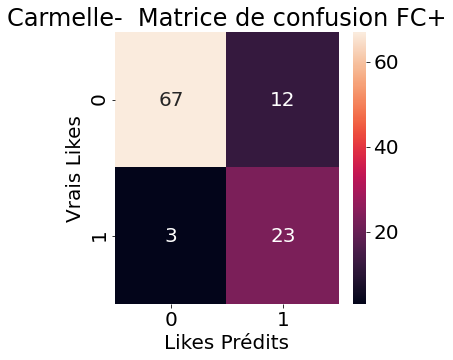

In [53]:
train_predictions_baseline = model_augmented.predict(x_train, batch_size=BATCH_SIZE)
test_predictions_baseline = model_augmented.predict(x_test, batch_size=BATCH_SIZE)
baseline_results = model_augmented.evaluate(x_test, y_test,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model_augmented.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(y_test, test_predictions_baseline,  augmented =True)

In [54]:
y_prob= model_augmented.predict(x_test)
y_pred= [  1 if y>0.5 else 0  for  y in y_prob]
reports["FC+"] = classification_report(y_test, y_pred, target_names=["Unlike","Like"])
print(reports["FC+"])

              precision    recall  f1-score   support

      Unlike       0.96      0.85      0.90        79
        Like       0.66      0.88      0.75        26

    accuracy                           0.86       105
   macro avg       0.81      0.87      0.83       105
weighted avg       0.88      0.86      0.86       105



In [55]:
all_predict=  model_augmented.predict(data_sortie)
likes_dnn=[]
perc_dnn=[]
for i,r in enumerate(all_predict):
    if r>0.5:
        likes_dnn.append(i)
        perc_dnn.append( int(100*r) )
        


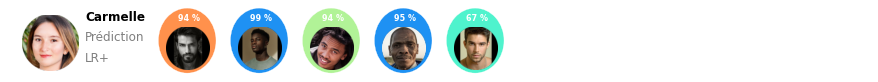

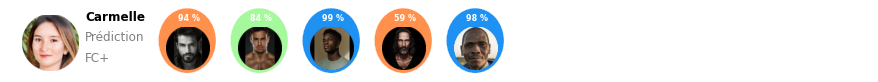

In [56]:
show_predict_like(personas[PERSONA],"LR+",likes_logreg,perc_logreg,names,labels_[48])
show_predict_like(personas[PERSONA],"FC+",likes_dnn,perc_dnn,names,labels_[48])

In [57]:
pickle.dump(reports, open("./save/reports_"+str(PERSONA) +".pkl", 'wb'))